In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

In [2]:
heart_prev = pd.read_csv("heart_disease_restaurants.csv")
heart_prev.drop("Unnamed: 0", axis=1, inplace=True)
display(heart_prev.head())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,Population,Population Group,Restaurant Group,median_household_income
0,1101,28.300000,36.400000,44.000000,46.600000,41.300000,19.300000,9.300000,2.0,9138,<20000,0-7,NaN
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,161714,>80000,0-7,32273.0
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,86339,>80000,0-7,18402.0
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,0.0,77817,60000-80000,0-7,21737.0
4,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035,2.0,173742,>80000,0-7,34064.0


### Features with positive correlations

Below are joint plots of heart disease prevalence and positively correlated features: smoking, hypertension, obesity, sedentarism, high cholesterol, and diabetes.


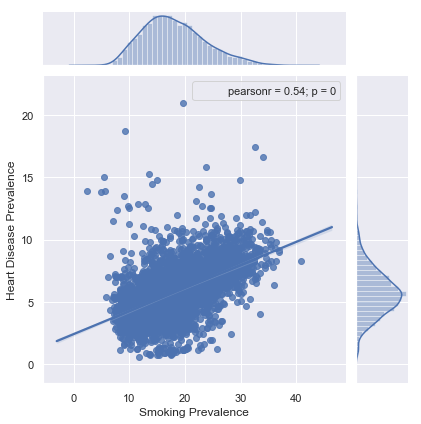

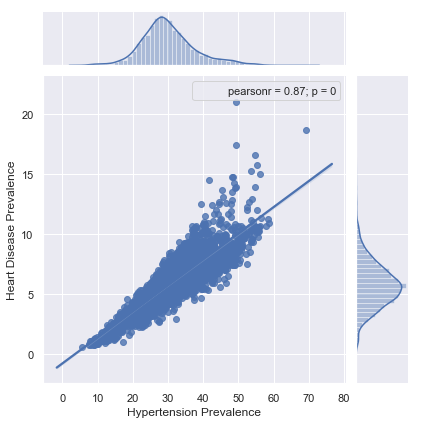

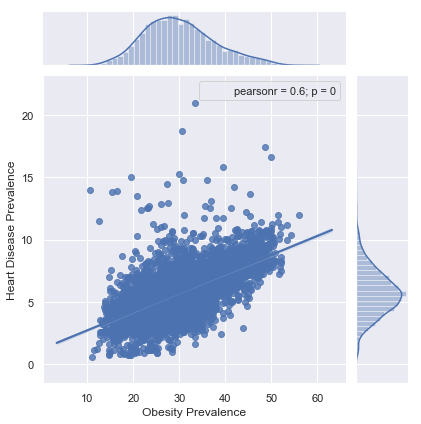

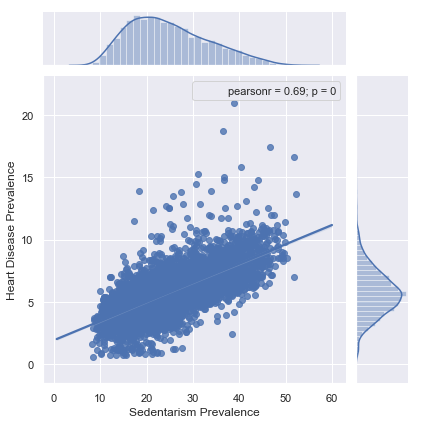

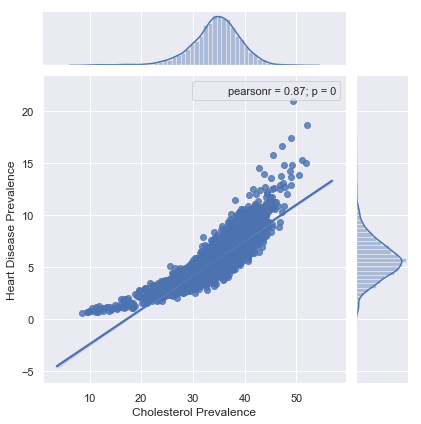

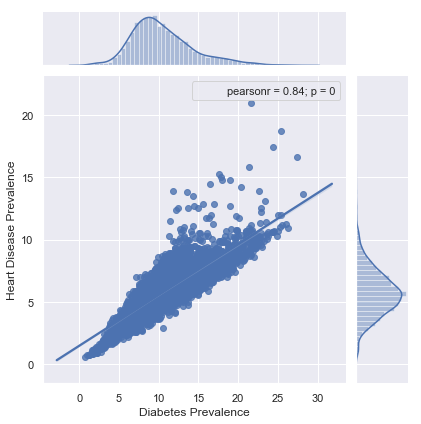

In [3]:
sns.jointplot("Smoking Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Hypertension Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Obesity Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Sedentarism Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Cholesterol Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Diabetes Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

From the joint plots it can be seen that these risk factors are strongly correlated with heart disease prevalence. Hypertenion, high cholesterol and diabetes have the strongest correlations.

These are known major risk factors for heart disease so strong correlations are expected.

###  Heart disease and median household income

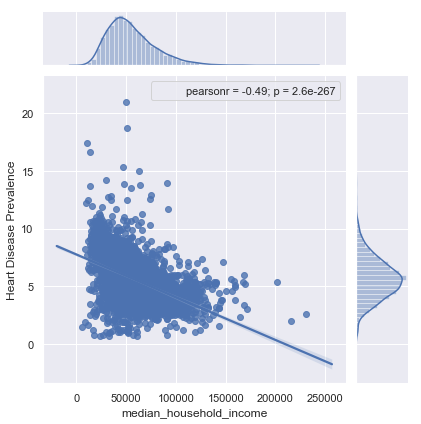

In [4]:
sns.jointplot("median_household_income","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

We see there is a moderate to strong negative correlation between median household income and heart disease prevalence.

Residents of zip codes with an average larger income likely have better access to healthcare, exercise and food options.

### Heart disease and restaurant count

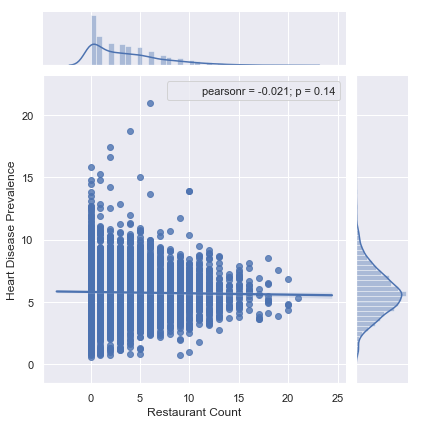

In [5]:
sns.jointplot("Restaurant Count","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

From the plot we see there is likely no correlation between a zip code's restaurant count and its number of restaurants. If a correlation exists it is very weak.

### Restaurant count and heart disease by zip code size

In the following plots we break down the zip codes by population size and plot restuarant count against heart disease prevalence.

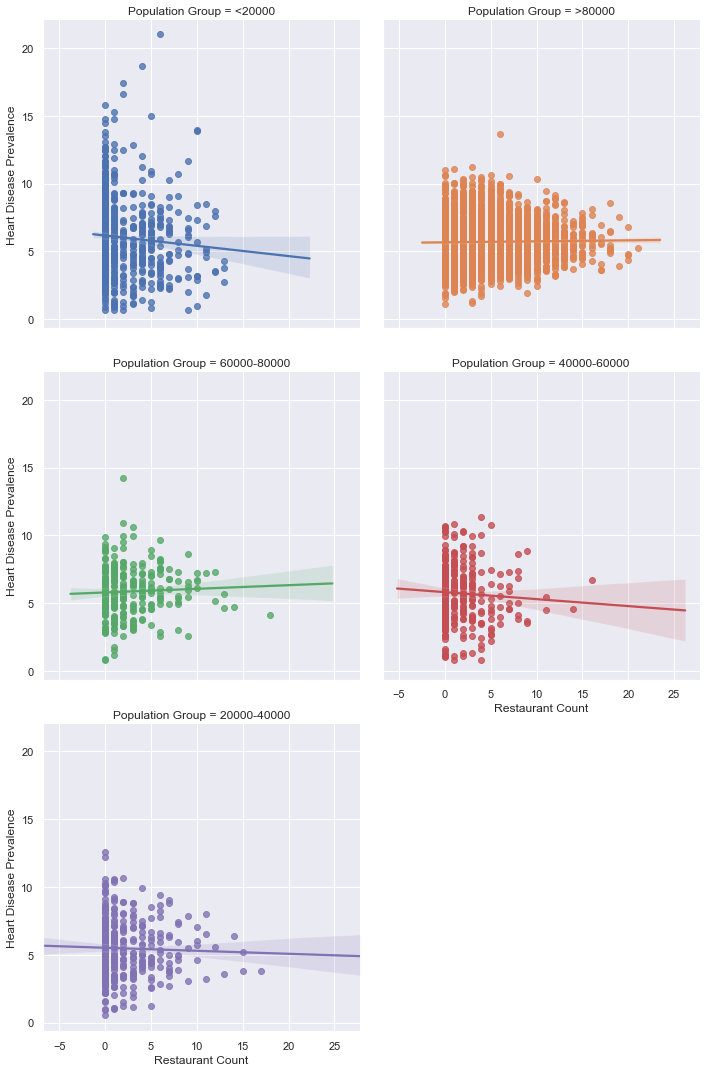

In [6]:
sns.lmplot("Restaurant Count","Heart Disease Prevalence",data=heart_prev,fit_reg=True, 
           col="Population Group", hue="Population Group", col_wrap=2)
plt.show()

We see there is a slight negative correlation between restaurant count and heart disease prevalence in zip codes with populations of 0-60000. There is a slight positive correlation in zip codes larger than this.

This observation may be due to chance and will need to be tested statistically.

### Distribution of population and restaurant count

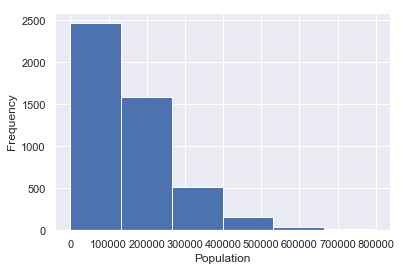

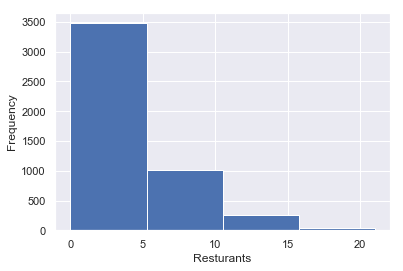

In [7]:
plt.hist(heart_prev["Population"], bins=6)
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

plt.hist(heart_prev["Restaurant Count"], bins=4)
plt.xlabel("Resturants")
plt.ylabel("Frequency")
plt.show()

We see that most of the data points are lower sized zip codes and zip codes with lower restaurant counts.

We have combined medium and high restaurant counts into a single category for comparison to low restaurant counts.

### Prevalence of heart disease by population size group

In [8]:
hpopgroups = heart_prev.groupby("Population Group")["Heart Disease Prevalence"].mean().reset_index()
display(hpopgroups)

,Population Group,Heart Disease Prevalence
0,20000-40000,5.473578
1,40000-60000,5.711464
2,60000-80000,5.856805
3,<20000,6.043355
4,>80000,5.706694


We see that there is a sharp drop in heart disease prevalence between populations of <20000 and populations of 20000-40000. Because most of the data points are within these bins, we will test that there is a statistical difference in the means of these groups.

### Prevalence of heart disease by restaurant count group

In [9]:
hrestgroups = heart_prev.groupby("Restaurant Group")["Heart Disease Prevalence"].mean().reset_index()
display(hrestgroups)

,Restaurant Group,Heart Disease Prevalence
0,0-7,5.780366
1,8-21,5.622086


We see that the mean disease prevalence of zip codes with 0-7 restaurants is slightly higher than zip codes with more restaurants.

One hypothesis is that this is due lower socioeconomic status in the zip codes with fewer restaurants. We can test that there is a statistical difference between the means of these two groups.